In [16]:
import pandas as pd
import geopandas as gpd

## Load weather data and station metadata

In [17]:
weather_data = pd.read_csv('./weather_data.csv', index_col=0)
weather_data.index = pd.DatetimeIndex(weather_data.index)
weather_data

,BROCKVILLE PCC;MEAN_TEMPERATURE,BROCKVILLE PCC;MIN_TEMPERATURE,BROCKVILLE PCC;MAX_TEMPERATURE,BROCKVILLE PCC;TOTAL_PRECIPITATION,POWELL RIVER A;MEAN_TEMPERATURE,POWELL RIVER A;MIN_TEMPERATURE,POWELL RIVER A;MAX_TEMPERATURE,POWELL RIVER A;TOTAL_PRECIPITATION,STONY MOUNTAIN;MEAN_TEMPERATURE,STONY MOUNTAIN;MIN_TEMPERATURE,...,CHATHAM POINT;MAX_TEMPERATURE,CHATHAM POINT;TOTAL_PRECIPITATION,GREENWOOD A;MEAN_TEMPERATURE,GREENWOOD A;MIN_TEMPERATURE,GREENWOOD A;MAX_TEMPERATURE,GREENWOOD A;TOTAL_PRECIPITATION,BROOKS;MEAN_TEMPERATURE,BROOKS;MIN_TEMPERATURE,BROOKS;MAX_TEMPERATURE,BROOKS;TOTAL_PRECIPITATION
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,
1990-01-01,-5.0,-10.0,0.0,0.0,3.6,2.0,5.2,0.0,-13.0,-25.0,...,3.5,1.2,2.2,-5.0,9.3,8.4,0.5,-2.2,3.1,0.0
1990-01-02,-4.0,-9.0,1.0,0.0,0.9,-2.0,3.8,1.8,-10.5,-13.0,...,4.2,13.2,-3.3,-8.0,1.4,0.0,-8.6,-15.2,-1.9,0.0
1990-01-03,0.5,-4.0,5.0,0.0,3.7,1.9,5.5,3.2,-15.0,-18.0,...,5.5,20.2,-1.7,-6.4,3.1,0.0,-7.1,-15.4,1.2,0.0
1990-01-04,4.0,2.0,6.0,2.4,5.9,3.8,8.0,1.0,-21.0,-25.0,...,6.9,11.8,-0.3,-7.1,6.6,3.0,-12.3,-15.1,-9.4,0.0
1990-01-05,-3.0,-4.0,-2.0,0.0,5.7,2.2,9.2,14.0,-18.5,-25.0,...,8.5,34.2,-0.7,-8.0,6.6,0.0,-10.3,-15.1,-5.4,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05,0.5,-3.0,4.0,0.0,-1.3,-2.0,-0.5,12.6,-24.5,-28.0,...,-2.0,16.0,2.8,-5.8,11.3,4.6,-27.8,-31.4,-24.3,0.0
2022-01-06,-2.0,-4.0,0.0,1.0,1.8,-1.5,5.0,8.6,-26.0,-29.0,...,1.0,13.0,5.3,-0.8,11.3,12.2,-27.0,-33.2,-20.7,0.4
2022-01-07,-9.3,-12.0,-6.5,0.0,0.0,-1.0,1.0,0.0,-22.5,-35.0,...,1.0,0.0,-2.3,-5.2,0.6,19.2,-19.8,-22.6,-16.9,0.0


In [18]:
station_metadata = pd.read_csv("./station_metadata.csv", index_col=0)
station_metadata

,x,y,STATION_NAME,FILENAME,PROVINCE_CODE,min_date,max_date,mean_temp_coverage,max_temp_coverage,total_precipitation_coverage,direction_max_gust_coverage,speed_max_gust_coverage,min_rel_humiudity_coverage,max_rel_humiudity_coverage
0,-75.666667,44.600000,BROCKVILLE PCC,station_4236_data.csv,ON,1990-01-01,2022-01-01,0.998624,0.999570,0.999398,0.000000,0.000000,0.000000,0.000000
1,-124.500278,49.834169,POWELL RIVER A,station_327_data.csv,BC,1990-01-01,2022-01-01,0.982635,0.982981,0.999914,0.000000,0.000000,0.000000,0.000000
2,-97.166667,50.116667,STONY MOUNTAIN,station_3678_data.csv,MB,1990-01-01,2022-01-01,0.999825,1.000000,0.999912,0.000000,0.000000,0.000000,0.000000
3,-82.933333,42.333333,WINDSOR RIVERSIDE,station_4715_data.csv,ON,1993-12-01,2022-01-01,1.000000,1.000000,0.999902,0.000000,0.000000,0.000000,0.000000
5,-77.533333,44.116667,TRENTON A,station_5126_data.csv,ON,1990-01-01,2022-01-01,0.953286,0.953286,0.953114,0.889711,0.899948,0.926445,0.926531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-93.966667,48.633333,BARWICK,station_3932_data.csv,ON,1990-01-01,2022-01-01,0.998912,0.999275,0.999637,0.000000,0.000000,0.000000,0.000000
115,-110.283333,54.416667,COLD LAKE A,station_2832_data.csv,AB,1990-01-01,2022-01-01,0.999914,0.999914,0.999914,0.908731,0.927346,0.999052,0.999224
116,-125.445556,50.333194,CHATHAM POINT,station_153_data.csv,BC,1990-01-01,2022-01-01,0.999359,0.999680,0.999786,0.000000,0.000000,0.000000,0.000000
117,-64.916667,44.983333,GREENWOOD A,station_6354_data.csv,NS,1990-01-01,2022-01-01,0.999743,0.999743,0.999743,0.965780,0.966293,0.998460,0.998802


## Visualize locations of included weather stations

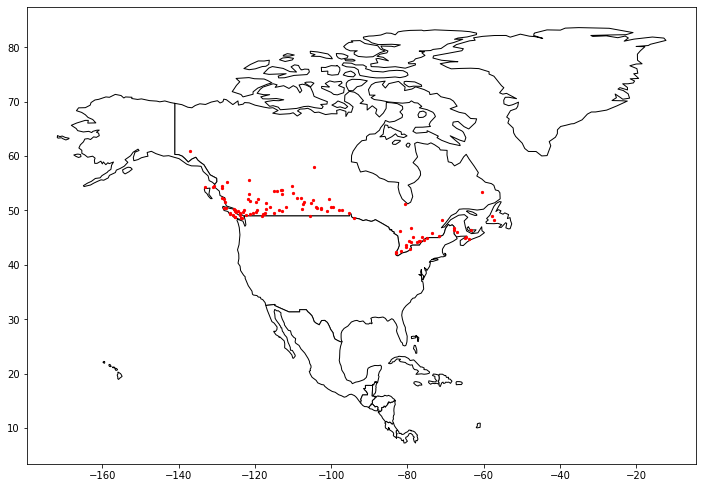

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.loc[world.continent == 'North America'].plot(color='white', edgecolor='black', figsize=(12,12))
ax.scatter(station_metadata.x, station_metadata.y, s=5, color='red')
ax

## Data visualization

Examine one series of each feature type.

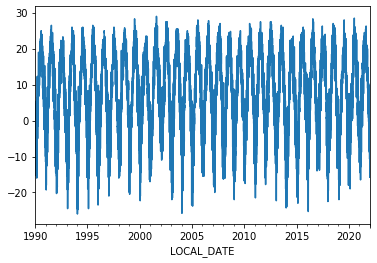

In [20]:
weather_data[('BROCKVILLE PCC;MEAN_TEMPERATURE')].plot()

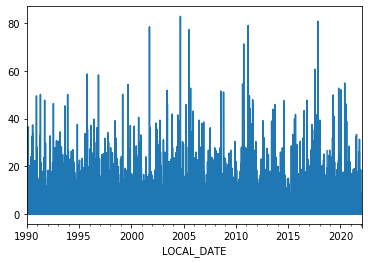

In [21]:
weather_data[('BROCKVILLE PCC;TOTAL_PRECIPITATION')].plot()

## Selecting feature subsets

In [22]:
feature_name = "MAX_TEMPERATURE"
weather_data[[col for col in weather_data.columns if feature_name in col]]

,BROCKVILLE PCC;MAX_TEMPERATURE,POWELL RIVER A;MAX_TEMPERATURE,STONY MOUNTAIN;MAX_TEMPERATURE,WINDSOR RIVERSIDE;MAX_TEMPERATURE,TRENTON A;MAX_TEMPERATURE,PEACHLAND;MAX_TEMPERATURE,CASTLEGAR BCHPA DAM;MAX_TEMPERATURE,OUTLOOK PFRA;MAX_TEMPERATURE,SCOTT CDA;MAX_TEMPERATURE,COWAN;MAX_TEMPERATURE,...,MACTAQUAC PROV PARK;MAX_TEMPERATURE,LEROY;MAX_TEMPERATURE,WHISTLER;MAX_TEMPERATURE,GREEN ISLAND;MAX_TEMPERATURE,QUINSAM RIVER HATCHERY;MAX_TEMPERATURE,BARWICK;MAX_TEMPERATURE,COLD LAKE A;MAX_TEMPERATURE,CHATHAM POINT;MAX_TEMPERATURE,GREENWOOD A;MAX_TEMPERATURE,BROOKS;MAX_TEMPERATURE
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,
1990-01-01,0.0,5.2,-1.0,NaN,1.2,NaN,3.0,1.5,-0.5,1.0,...,3.0,0.5,2.0,4.0,5.5,-4.0,-1.6,3.5,9.3,3.1
1990-01-02,1.0,3.8,-8.0,NaN,0.8,NaN,1.5,-8.0,-10.0,-11.0,...,-0.5,-9.5,-2.8,7.0,5.0,-0.5,-10.3,4.2,1.4,-1.9
1990-01-03,5.0,5.5,-12.0,NaN,5.1,NaN,0.5,-7.5,-13.0,-11.5,...,3.5,-13.5,-0.1,6.5,6.0,-3.0,-12.2,5.5,3.1,1.2
1990-01-04,6.0,8.0,-17.0,NaN,5.7,NaN,2.0,-13.5,-17.0,-17.0,...,5.0,-20.0,2.2,8.0,9.0,-11.0,-18.8,6.9,6.6,-9.4
1990-01-05,-2.0,9.2,-12.0,NaN,0.8,NaN,2.5,4.5,3.5,-14.5,...,-1.0,-3.0,4.2,9.0,8.5,-15.0,-10.8,8.5,6.6,-5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05,4.0,-0.5,-21.0,3.0,NaN,NaN,1.0,-25.8,-30.1,-25.0,...,4.0,-28.0,NaN,-5.5,NaN,-19.0,-27.9,-2.0,11.3,-24.3
2022-01-06,0.0,5.0,-23.0,-3.5,-1.3,NaN,-2.0,-28.8,-27.0,-20.0,...,3.0,-33.5,NaN,-5.0,NaN,-22.0,-28.9,1.0,11.3,-20.7
2022-01-07,-6.5,1.0,-10.0,-5.0,-4.1,NaN,1.5,-18.2,-22.4,NaN,...,NaN,-21.0,NaN,-3.0,NaN,-11.5,-22.8,1.0,0.6,-16.9


## Selecting location subsets

In [23]:
station_name = "BROCKVILLE PCC"
weather_data[[col for col in weather_data.columns if station_name in col]]

,BROCKVILLE PCC;MEAN_TEMPERATURE,BROCKVILLE PCC;MIN_TEMPERATURE,BROCKVILLE PCC;MAX_TEMPERATURE,BROCKVILLE PCC;TOTAL_PRECIPITATION
LOCAL_DATE,,,,
1990-01-01,-5.0,-10.0,0.0,0.0
1990-01-02,-4.0,-9.0,1.0,0.0
1990-01-03,0.5,-4.0,5.0,0.0
1990-01-04,4.0,2.0,6.0,2.4
1990-01-05,-3.0,-4.0,-2.0,0.0
...,...,...,...,...
2022-01-05,0.5,-3.0,4.0,0.0
2022-01-06,-2.0,-4.0,0.0,1.0
2022-01-07,-9.3,-12.0,-6.5,0.0
